## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\a0970\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

# 對照版本

In [13]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.8655 - acc: 0.3353 - val_loss: 1.7292 - val_acc: 0.3720
Epoch 2/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.6702 - acc: 0.4015 - val_loss: 1.5986 - val_acc: 0.4307
Epoch 3/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.5987 - acc: 0.4301 - val_loss: 1.6037 - val_acc: 0.4221
Epoch 4/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.5535 - acc: 0.4456 - val_loss: 1.5512 - val_acc: 0.4437
Epoch 5/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.5082 - acc: 0.4622 - val_loss: 1.5171 - val_acc: 0.4590
Epoch 6/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.4799 - acc: 0.4724 - val_loss: 1.5748 - val_acc: 0.4405
Epoch 7/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.4669 - acc: 0.4767 - val_loss: 1.

50000/50000 [==============================] - 9s 176us/step - loss: 0.8786 - acc: 0.6859 - val_loss: 1.5655 - val_acc: 0.5130
Epoch 60/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.8689 - acc: 0.6885 - val_loss: 1.5667 - val_acc: 0.5136
Epoch 61/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.8568 - acc: 0.6938 - val_loss: 1.5659 - val_acc: 0.5121
Epoch 62/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.8567 - acc: 0.6930 - val_loss: 1.5824 - val_acc: 0.5142
Epoch 63/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.8541 - acc: 0.6966 - val_loss: 1.5983 - val_acc: 0.5128
Epoch 64/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.8360 - acc: 0.7021 - val_loss: 1.6071 - val_acc: 0.5100
Epoch 65/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.8433 - acc: 0.6986 - val_loss: 1.6227 - val_acc: 0.5099
Epoch 66/100
50000/50000 [=======

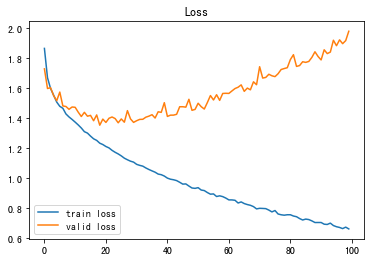

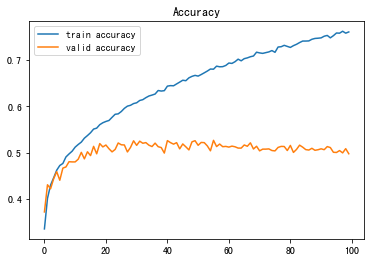

In [14]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# SGD

In [17]:
"""
Compile 模型
"""
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 190us/step - loss: 2.2627 - acc: 0.1670 - val_loss: 2.2183 - val_acc: 0.2139
Epoch 2/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.1938 - acc: 0.2243 - val_loss: 2.1641 - val_acc: 0.2435
Epoch 3/100
50000/50000 [==============================] - 9s 183us/step - loss: 2.1450 - acc: 0.2454 - val_loss: 2.1202 - val_acc: 0.2549
Epoch 4/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.1041 - acc: 0.2595 - val_loss: 2.0826 - val_acc: 0.2656
Epoch 5/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.0682 - acc: 0.2716 - val_loss: 2.0502 - val_acc: 0.2737
Epoch 6/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.0379 - acc: 0.2810 - val_loss: 2.0218 - val_acc: 0.2824
Epoch 7/100
50000/50000 [==============================] - 9s 181us/step - loss: 2.0119 - acc: 0.2896 - val_loss: 1

50000/50000 [==============================] - 9s 177us/step - loss: 1.6743 - acc: 0.4140 - val_loss: 1.6739 - val_acc: 0.4151
Epoch 60/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.6709 - acc: 0.4157 - val_loss: 1.6731 - val_acc: 0.4115
Epoch 61/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.6680 - acc: 0.4167 - val_loss: 1.6670 - val_acc: 0.4165
Epoch 62/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.6653 - acc: 0.4180 - val_loss: 1.6669 - val_acc: 0.4144
Epoch 63/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.6626 - acc: 0.4177 - val_loss: 1.6634 - val_acc: 0.4188
Epoch 64/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.6595 - acc: 0.4201 - val_loss: 1.6602 - val_acc: 0.4178
Epoch 65/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.6566 - acc: 0.4207 - val_loss: 1.6591 - val_acc: 0.4171
Epoch 66/100
50000/50000 [=======

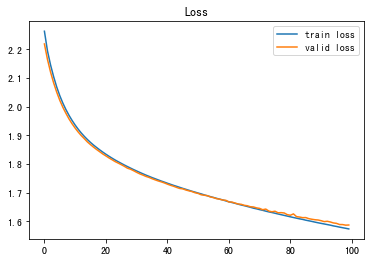

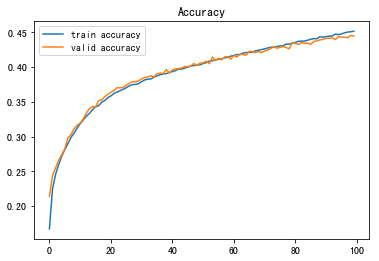

In [18]:

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 500 epochs 

In [15]:
"""
Compile 模型
"""
model = build_mlp()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.9168 - acc: 0.3071 - val_loss: 1.7624 - val_acc: 0.3749
Epoch 2/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.7310 - acc: 0.3815 - val_loss: 1.7005 - val_acc: 0.3929
Epoch 3/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.6497 - acc: 0.4099 - val_loss: 1.6201 - val_acc: 0.4186
Epoch 4/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.5836 - acc: 0.4358 - val_loss: 1.6015 - val_acc: 0.4385
Epoch 5/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.5344 - acc: 0.4538 - val_loss: 1.5169 - val_acc: 0.4585
Epoch 6/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.5003 - acc: 0.4656 - val_loss: 1.5121 - val_acc: 0.4620
Epoch 7/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.4605 - acc: 0.4801 - val_l

Epoch 59/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.8627 - acc: 0.6890 - val_loss: 1.5256 - val_acc: 0.5177
Epoch 60/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.8632 - acc: 0.6907 - val_loss: 1.6066 - val_acc: 0.5024
Epoch 61/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.8666 - acc: 0.6881 - val_loss: 1.6032 - val_acc: 0.5062
Epoch 62/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.8502 - acc: 0.6952 - val_loss: 1.5601 - val_acc: 0.5173
Epoch 63/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.8503 - acc: 0.6950 - val_loss: 1.5597 - val_acc: 0.5159
Epoch 64/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.8406 - acc: 0.6961 - val_loss: 1.5812 - val_acc: 0.5139
Epoch 65/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.8329 - acc: 0.7002 - val_loss: 1.6001 - val_acc: 0.5108
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.5874 - acc: 0.7907 - val_loss: 2.0710 - val_acc: 0.4970
Epoch 118/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.5896 - acc: 0.7882 - val_loss: 2.0614 - val_acc: 0.5029
Epoch 119/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.5772 - acc: 0.7930 - val_loss: 2.1740 - val_acc: 0.4924
Epoch 120/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.6022 - acc: 0.7842 - val_loss: 2.1395 - val_acc: 0.4993
Epoch 121/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.5792 - acc: 0.7916 - val_loss: 2.2069 - val_acc: 0.4923
Epoch 122/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.5675 - acc: 0.7959 - val_loss: 2.1010 - val_acc: 0.5049
Epoch 123/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.5601 - acc: 0.7992 - val_loss: 2.1637 - val_acc: 0.5020
Epoch 

Epoch 175/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.4498 - acc: 0.8379 - val_loss: 2.7496 - val_acc: 0.4765
Epoch 176/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.4393 - acc: 0.8409 - val_loss: 2.6795 - val_acc: 0.4852
Epoch 177/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.4387 - acc: 0.8426 - val_loss: 2.7182 - val_acc: 0.4852
Epoch 178/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.4359 - acc: 0.8432 - val_loss: 2.7632 - val_acc: 0.4882
Epoch 179/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.4338 - acc: 0.8437 - val_loss: 2.6426 - val_acc: 0.4912
Epoch 180/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.4485 - acc: 0.8377 - val_loss: 2.7261 - val_acc: 0.4841
Epoch 181/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.4381 - acc: 0.8431 - val_loss: 2.7502 - val_acc: 0.4778
Epoch 

Epoch 233/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.3404 - acc: 0.8780 - val_loss: 3.1579 - val_acc: 0.4849
Epoch 234/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.3713 - acc: 0.8656 - val_loss: 3.2006 - val_acc: 0.4875
Epoch 235/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.3331 - acc: 0.8808 - val_loss: 3.1649 - val_acc: 0.4821
Epoch 236/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.3208 - acc: 0.8840 - val_loss: 3.2254 - val_acc: 0.4826
Epoch 237/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.3462 - acc: 0.8748 - val_loss: 3.2444 - val_acc: 0.4769
Epoch 238/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.3286 - acc: 0.8824 - val_loss: 3.2800 - val_acc: 0.4762
Epoch 239/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.3590 - acc: 0.8711 - val_loss: 3.2384 - val_acc: 0.4741
Epoch 

Epoch 291/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.2715 - acc: 0.9021 - val_loss: 3.6066 - val_acc: 0.4745
Epoch 292/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.2796 - acc: 0.8992 - val_loss: 3.6077 - val_acc: 0.4743
Epoch 293/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.2709 - acc: 0.9035 - val_loss: 3.6017 - val_acc: 0.4801
Epoch 294/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.2834 - acc: 0.8984 - val_loss: 3.6666 - val_acc: 0.4772
Epoch 295/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.3089 - acc: 0.8893 - val_loss: 3.6948 - val_acc: 0.4695
Epoch 296/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.2631 - acc: 0.9056 - val_loss: 3.6963 - val_acc: 0.4749
Epoch 297/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.2600 - acc: 0.9079 - val_loss: 3.6658 - val_acc: 0.4799
Epoch 

Epoch 349/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.2028 - acc: 0.9275 - val_loss: 3.9068 - val_acc: 0.4773
Epoch 350/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.2565 - acc: 0.9075 - val_loss: 4.0440 - val_acc: 0.4779
Epoch 351/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.2688 - acc: 0.9030 - val_loss: 3.9854 - val_acc: 0.4789
Epoch 352/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.2205 - acc: 0.9212 - val_loss: 4.0481 - val_acc: 0.4811
Epoch 353/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.2935 - acc: 0.8946 - val_loss: 3.9399 - val_acc: 0.4819
Epoch 354/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.2379 - acc: 0.9132 - val_loss: 3.9391 - val_acc: 0.4732
Epoch 355/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.2116 - acc: 0.9237 - val_loss: 3.9298 - val_acc: 0.4741
Epoch 

Epoch 407/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.2104 - acc: 0.9257 - val_loss: 4.1837 - val_acc: 0.4766
Epoch 408/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.1634 - acc: 0.9428 - val_loss: 4.3175 - val_acc: 0.4697
Epoch 409/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.1981 - acc: 0.9283 - val_loss: 4.2578 - val_acc: 0.4726
Epoch 410/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.1770 - acc: 0.9364 - val_loss: 4.3108 - val_acc: 0.4676
Epoch 411/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.2302 - acc: 0.9180 - val_loss: 4.3102 - val_acc: 0.4749
Epoch 412/500
50000/50000 [==============================] - 11s 225us/step - loss: 0.2796 - acc: 0.9008 - val_loss: 4.2713 - val_acc: 0.4714
Epoch 413/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.2110 - acc: 0.9246 - val_loss: 4.2284 - val_acc: 0.4758
Epoch 

Epoch 465/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.1657 - acc: 0.9410 - val_loss: 4.5636 - val_acc: 0.4684
Epoch 466/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.1943 - acc: 0.9305 - val_loss: 4.5251 - val_acc: 0.4618
Epoch 467/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.2152 - acc: 0.9238 - val_loss: 4.4849 - val_acc: 0.4689
Epoch 468/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.1980 - acc: 0.9296 - val_loss: 4.5091 - val_acc: 0.4710
Epoch 469/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.1535 - acc: 0.9455 - val_loss: 4.5297 - val_acc: 0.4705
Epoch 470/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.1954 - acc: 0.9313 - val_loss: 4.5335 - val_acc: 0.4662
Epoch 471/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.1545 - acc: 0.9451 - val_loss: 4.5989 - val_acc: 0.4703
Epoch 

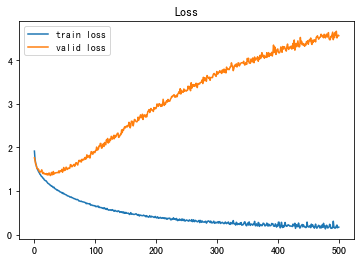

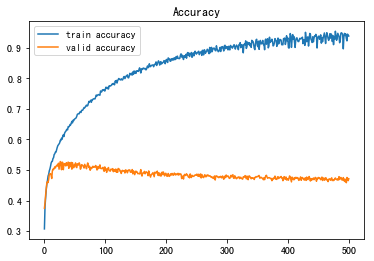

In [16]:


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()